In [1]:
%matplotlib inline
import pandas as pd

In [2]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [3]:
titles = pd.DataFrame.from_csv('data/titles.csv', index_col=None)
titles.head()

,title,year
0,Chhota Bhai,1966
1,Roaring Road,1926
2,Swipe,2011
3,Vestidas y alborotadas,1968
4,Lion,2015


In [4]:
cast = pd.DataFrame.from_csv('data/cast.csv', index_col=None)
cast.head()

,title,year,name,type,character,n
0,Suuri illusioni,1985,Homo $,actor,Guests,22.0
1,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
2,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
3,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN
4,Straight Outta Compton,2015,$hutter,actor,Club Patron,NaN


### Using groupby(), plot the number of films that have been released each decade in the history of cinema.

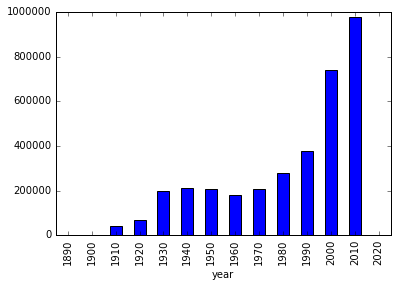

In [11]:
N=cast
N=N.groupby([N.year//10 *10]).size()
N.plot(kind ='bar')


#### 

### Use groupby() to plot the number of "Hamlet" films made each decade.

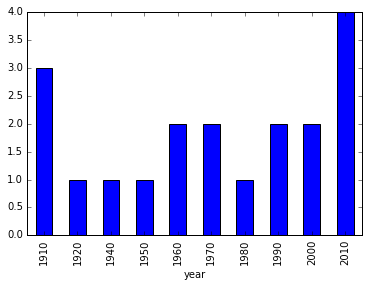

In [17]:
N=titles
N=N[N.title == 'Hamlet']
N=N.groupby([N.year//10 *10]).size().plot(kind ='bar')


### How many leading (n=1) roles were available to actors, and how many to actresses, in each year of the 1950s?

In [24]:
C=cast
C=C[C.year//10 ==195]
C=C[C.n ==1]
C=C.groupby(['year','type']).size()
C

year  type   
1950  actor      615
      actress    278
1951  actor      644
      actress    276
1952  actor      600
      actress    288
1953  actor      651
      actress    296
1954  actor      638
      actress    305
1955  actor      620
      actress    273
1956  actor      632
      actress    297
1957  actor      716
      actress    293
1958  actor      703
      actress    280
1959  actor      699
      actress    308
dtype: int64

### In the 1950s decade taken as a whole, how many total roles were available to actors, and how many to actresses, for each "n" number 1 through 5?

In [30]:
C=cast
C=C[(C.year//10 *10 ==1950) & (C.n <= 5)]
C=C.groupby(['n','type']).size()
C

n    type   
1.0  actor      6518
     actress    2894
2.0  actor      4473
     actress    4493
3.0  actor      5501
     actress    3099
4.0  actor      5498
     actress    2803
5.0  actor      5523
     actress    2504
dtype: int64

### Use groupby() to determine how many roles are listed for each of the Pink Panther movies.

In [45]:
C=cast
C=C[(C.title == 'The Pink Panther')]
C=C.groupby(['year'])[['n']].size()
C

year
1963    19
2006    89
dtype: int64

### List, in order by year, each of the films in which Frank Oz has played more than 1 role.

In [58]:
C=cast
C=C[(C.name == 'Frank Oz')]
C=C.groupby(['year','title']).size()

C[C >1]

year  title                               
1979  The Muppet Movie                        8
1981  An American Werewolf in London          2
      The Great Muppet Caper                  6
1982  The Dark Crystal                        2
1984  The Muppets Take Manhattan              7
1985  Follow That Bird                        3
1992  The Muppet Christmas Carol              7
1996  Muppet Treasure Island                  4
1999  Muppets from Space                      4
      The Adventures of Elmo in Grouchland    3
dtype: int64

### List each of the characters that Frank Oz has portrayed at least twice.

In [61]:
C=cast
C=C[(C.name == 'Frank Oz')]
C=C.groupby(['character']).size()

C[C >=2].sort_values()

character
Grover            2
Bert              3
Cookie Monster    3
Fozzie Bear       4
Sam the Eagle     5
Animal            6
Miss Piggy        6
Yoda              6
dtype: int64